### Proje Başlığı: Hisse Senetlerinin Sektörel Benzerlik Analizi ve Sınıflandırma Modeli Geliştirilmesi

#### Proje Amacı: Farklı sektörlerdeki hisse senetlerinin zaman serisi davranışlarını analiz ederek, bir hisse senedinin hangi sektöre daha çok benzediğini tespit etmek ve bu bilgiyi yatırım stratejileri için kullanmak.

----------------------------------------------------------------------------------

### Project Title: Sectoral Similarity Analysis and Classification Model Development for Stocks

#### Project Objective : To analyze the time series behavior of stocks from different sectors in order to identify which sector a given stock most closely resembles, and to leverage this information for investment strategy development.



### 1. Veri Toplama 

+ `yfinance`, `investpy`, `quandl` gibi kütüphaneler kullanılarak, 2005-01-01 tarihinden itibaren aylık getirilere sahip hisse senetleri ve sektör verileri toplanacak.
+ Web scraping ile sektörlerin ve hisse senetlerinin listesi çekilecek.

----------------------------------------------------------------------------------

### 1. Data Collection

+ Using libraries such as `yfinance`, `investpy`, and `quandl`, stock and sector data with monthly returns starting from 2005-01-01 will be collected.
+ The list of sectors and stocks will be retrieved via web scraping.



In [ ]:
import pandas as pd
import requests                 # requests: Web sitelerine HTTP isteği atıp, sayfa içeriğini almak için.
from bs4 import BeautifulSoup   # BeautifulSoup: HTML içeriklerini kolayca parse (ayrıştırmak) ve bilgi çekmek için.
from io import StringIO         # StringIO: HTML tablo içeriğini bir "dosya gibi" Pandas’a okutmak için.

### 1.1 Sektör Adlarını Getirme

----------------------------------------------------------------------------------

### 1.1 Retrieving Sector Names


In [16]:
def fetch_sectors_names():  

    url = "https://stockanalysis.com/stocks/industry/sectors/"   # URL Tanımlama 
    response = requests.get(url)  # requests ile HTTP GET isteği atar (web sayfası verisi çekilir).

    if response.status_code == 200:  # Eğer başarılıysa (status_code 200 ise):
        soup = BeautifulSoup(response.content, "html.parser")  # BeautifulSoup ile HTML’i ayrıştırır.
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]  # Tüm tablo elementlerini string’e çevirip, Pandas’ın read_html fonksiyonu ile tabloya çevirir (ilk tabloyu alır).
    else:
        print(f"Error: Failed to fetch data from page {url}")  # Başarısızsa uyarı verir
    return df

### 1.2 Endüstiri Listesini Getirme

+ Bu fonksiyon, stockanalysis.com sitesinden tüm endüstri (industry) listesini otomatik olarak çekip bir DataFrame (tablo) olarak döndürür.

----------------------------------------------------------------------------------

### 1.2 Retrieving the Industry List

+ This function automatically fetches the complete list of industries from stockanalysis.com and returns it as a DataFrame (table).


In [17]:
def fetch_industry_names():

    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]

    else:
        print(f"Error: Failed to fetch data from page {url}")
    return df


### 1.3 Tüm Hisse Senetlerini Getir

+ Bu fonksiyon, belli bir sektör ismi girildiğinde, stockanalysis.com sitesinden o sektöre ait tüm hisse senetlerini ve ilgili bilgileri Pandas DataFrame olarak çeker.
+ Kullanım yeri: Projede, her sektör için hisse senetleri ve bazı temel finansal metrikleri almak.

----------------------------------------------------------------------------------

### 1.3 Retrieving All Stocks

+ This function fetches all stocks and related information for a given sector name from stockanalysis.com as a Pandas DataFrame.
+ Usage: In the project, it is used to retrieve stocks and some basic financial metrics for each sector.


In [18]:
def fetch_data(sectors):

    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)

    else:
        print(f"Error: Failed to fetch data from page {url}")
    return df

In [31]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [24]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Healthcare,1141,"7,200.25B",0.51%,40.62,4.09%,-0.14%,10.62%
1,Financials,903,11.69T,0.11%,16.48,18.46%,-0.25%,23.52%
2,Technology,764,20.84T,0.52%,41.50,15.17%,-1.26%,27.52%
3,Industrials,677,"6,005.20B",1.25%,29.56,7.22%,-0.23%,18.14%
4,Consumer Discretionary,565,"8,223.41B",0.76%,27.79,6.45%,-0.84%,24.34%
5,Materials,271,"2,019.75B",1.69%,26.07,6.69%,0.79%,4.41%
6,Real Estate,262,"1,605.55B",4.23%,57.61,7.55%,0.08%,6.72%
7,Communication Services,256,"6,501.79B",1.35%,25.57,13.27%,-0.67%,25.31%
8,Energy,256,"3,346.05B",3.16%,14.97,6.78%,0.65%,-2.95%
9,Consumer Staples,245,"4,336.99B",1.66%,27.68,5.37%,0.38%,18.80%


In [ ]:
indusrty

,Industry Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Biotechnology,648,772.58B,0.08%,-,-46.13%,0.06%,28.58%
1,Banks - Regional,345,"1,643.74B",2.56%,12.73,25.42%,0.09%,22.31%
2,Software - Application,231,"3,104.52B",0.37%,68.46,11.78%,-0.96%,37.47%
3,Software - Infrastructure,152,"5,171.59B",0.20%,42.86,23.15%,-0.68%,39.08%
4,Medical Devices,148,923.42B,0.33%,45.03,9.64%,-0.20%,13.08%
...,...,...,...,...,...,...,...,...
140,Real Estate - Diversified,4,6.68B,2.96%,19.18,15.23%,-0.47%,-6.46%
141,Confectioners,4,119.59B,3.00%,22.42,11.12%,0.98%,-10.31%
142,Textile Manufacturing,3,2.12B,1.45%,132.36,0.80%,-0.68%,-26.97%
143,Infrastructure Operations,3,37.92B,2.11%,11.34,35.17%,-0.11%,30.32%


### 1.4 Sektör Listerine Erişmek Ve Kaydetme

----------------------------------------------------------------------------------

### 1.4 Accessing and Saving Sector Lists


In [ ]:
# İlgili sectorleri seçip datalarını csv dosyalarına kaydediyoruz

fetch_data(sectors='energy').to_csv('../Data/Stock_Sectors/energy.csv')
fetch_data(sectors='financials').to_csv('../Data/Stock_Sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv('../Data/Stock_Sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv('../Data/Stock_Sectors/technology.csv')
fetch_data(sectors='utilities').to_csv('../Data/Stock_Sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv('../Data/Stock_Sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv('../Data/Stock_Sectors/materials.csv')
fetch_data(sectors='technology').to_csv('../Data/Stock_Sectors/technology.csv')
fetch_data(sectors='industrials').to_csv('../Data/Stock_Sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('../Data/Stock_Sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('../Data/Stock_Sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('../Data/Stock_Sectors/communication-services.csv')

In [36]:
finance = pd.read_csv('../Data/Stock_Sectors/financials.csv')
finance.Symbol

0      BRK.B
1        JPM
2          V
3         MA
4        BAC
       ...  
903     BENF
904      DXF
905      XHG
906     LGHL
907     BTOG
Name: Symbol, Length: 908, dtype: object

### 1.5 Veriye Erişmek

+ Diyelim ki, finans sektöründen HSBC sembolü için verileri indirmek istiyoruz. Bu işlem için `yfinance` kütüphanesini kullanabiliriz. Aşağıdaki adımları takip ederek veriye erişim sağlayabiliriz:

1. **Ticker Nesnesi Oluşturma**: İlk olarak, yfinance kütüphanesindeki `.Ticker` fonksiyonunu
kullanarak bir obje oluşturabiliriz. Bu obje, ilgili sembolün (örneğin HSBC) verilerine erişim
sağlar. Ayrıca, bu adımda sembolün doğru olup olmadığını teyit edebiliriz.

2. **Metadata Erişimi**: `.get_history_metadata()` fonksiyonu ile sembolün geçmişine ve diğer
temel bilgilerine erişim sağlayabiliriz. Bu, sembolün geçerliliğini ve geçmiş performansını
kontrol etmek için faydalıdır.

3. **Tarihsel Veriyi İndirme**: `.history(period='3y')` fonksiyonu ile son 3 yıla ait tarihsel
fiyat verilerini indirebiliriz. Bu veri, kapanış fiyatları, hacim, en yüksek ve en düşük fiyatlar
gibi bilgileri içerir.

----------------------------------------------------------------------------------

### 1.5 Accessing the Data

+ Suppose we want to download data for the HSBC symbol from the financial sector. We can use the `yfinance` library to achieve this. By following the steps below, we can access the data:

1. **Creating a Ticker Object**: First, we can use the `.Ticker` function from the `yfinance` library to create an object. This object allows access to data for the specified symbol (e.g., HSBC). Additionally, we can verify whether the symbol is valid at this step.

2. **Accessing Metadata**: With the `.get_history_metadata()` function, we can access historical and basic metadata for the symbol. This is useful for checking the validity and historical performance of the stock.

3. **Downloading Historical Data**: The `.history(period='3y')` function allows us to download historical price data for the past 3 years. This includes information such as closing prices, volume, and high/low prices.


In [38]:
import yfinance
ticker_name = yfinance.Ticker("HSBC")
ticker_name.info

{'address1': '8 Canada Square',
 'city': 'London',
 'zip': 'E14 5HQ',
 'country': 'United Kingdom',
 'phone': '44 20 7991 3048',
 'website': 'https://www.hsbc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'HSBC Holdings plc engages in the provision of banking and financial products and services worldwide. It operates through three segments: Wealth and Personal Banking, Commercial Banking, and Global Banking and Markets. The Wealth and Personal Banking segment offers retail banking and wealth products, including current and savings accounts, mortgages and personal loans, credit and debit cards, and local and international payment services; and wealth management services comprising insurance and investment products, global asset management services, and investment management and private w

In [39]:
ticker_name.get_history_metadata()

{'currency': 'USD',
 'symbol': 'HSBC',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 932131800,
 'regularMarketTime': 1748030402,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 59.24,
 'fiftyTwoWeekHigh': 61.88,
 'fiftyTwoWeekLow': 39.42,
 'regularMarketDayHigh': 59.35,
 'regularMarketDayLow': 58.63,
 'regularMarketVolume': 1439379,
 'longName': 'HSBC Holdings plc',
 'shortName': 'HSBC Holdings, plc.',
 'chartPreviousClose': 58.87,
 'previousClose': 59.41,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1747987200,
   'end': 1748007000,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1748007000,
   'end': 1748030400,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1748030400,
   'end': 1748044800,
   'gmtoffset': -14400}},
 'tradingPeriods':            

In [ ]:
# periyod vererek verilerin süreli isteği

data=ticker_name.history(period='2y')
data.tail()
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-24 00:00:00-04:00,31.733814,31.793304,31.521349,31.614834,2413900,0.0,0.0
2023-05-25 00:00:00-04:00,32.014267,32.056762,31.716817,31.937782,1834600,0.0,0.0
2023-05-26 00:00:00-04:00,32.090757,32.252233,32.031267,32.141750,1267000,0.0,0.0
2023-05-30 00:00:00-04:00,31.963279,32.005772,31.614836,31.801804,1225800,0.0,0.0
2023-05-31 00:00:00-04:00,31.410867,31.427865,31.138912,31.291887,1714700,0.0,0.0


Şimdi ise, belirlenen sembollerin verilerini belirli bir tarihten itibaren çekebiliriz. Daha sonra,
bu veriler `tsfresh` paketi kullanımı için uygun bir formata dönüştürülerek, özellik mühendisliği işlemlerine başlanabilir. 

Ek olarak, verinin kendisiyle oluşturulan model performansını iyileştirmek amacıyla farklı özellik mühendisliği çalışmaları tamamlandıktan sonra, istenilen performansa ulaşılamadığı durumda serinin orijinal değerleri yerine, göstergeler(indicators) üzerinden elde
edilen serilerle bir çalışma planlanabilir.

----------------------------------------------------------------------------------

Now, we can fetch the data of selected symbols starting from a specified date. Then, this data can be transformed into a format suitable for use with the `tsfresh` package to begin the feature engineering process.

Additionally, after completing various feature engineering steps aimed at improving the model performance using the raw data, if the desired performance is still not achieved, a new approach can be planned. In this case, instead of using the original time series values, the analysis can focus on series generated from technical indicators.


In [ ]:
ticker_list=['AAPL', 'NVDA', 'INTC', 'ORCL', 'SONY']
data = yfinance.download(ticker_list, start='2005-01-01') # o yıldan itibaren günlük veriyi indirme veri yapısı df sütunlar multiindex
data_close=data[['Close']] # sadece kapanış verilerini alalım 
data_close.columns = ['_'.join(col) for col in data_close.columns]# ('Close', 'AAPL') → 'Close_AAPL'
data_monthly_mom=data['Close'].resample('ME').last().pct_change()+1 # aylık büyüme Month-End (ay sonu gününü alıp büyüme küçülme oranı kar zarar örnek 1.08) yüzde 8 lik büyüme

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [42]:
data_close

,Close_AAPL,Close_INTC,Close_NVDA,Close_ORCL,Close_SONY
Date,,,,,
2005-01-03,0.951065,13.334919,0.180191,10.791704,7.138319
2005-01-04,0.960833,13.069020,0.171708,10.510044,7.007391
2005-01-05,0.969248,12.941860,0.173313,10.542234,6.998172
2005-01-06,0.969999,12.982324,0.171632,10.638802,6.985262
2005-01-07,1.040626,13.178851,0.168346,10.727322,7.047960
...,...,...,...,...,...
2025-05-19,208.779999,21.379999,135.570007,159.639999,25.040001
2025-05-20,206.860001,21.270000,134.380005,160.309998,25.799999
2025-05-21,202.089996,20.690001,131.800003,157.179993,24.889999


### Bilgilendirme:

+ SMA, kısa vadeli dalgalanmaları yumuşatır ama gecikme (lag) yaratır.
+ Trend takibi ve destek/direnç analizinde kullanılır.
+ window değeri ne kadar büyükse, ortalama o kadar "yavaş" tepki verir.

-----------------------------------------------------------------------

### Notes:

+ SMA smooths short-term fluctuations but introduces lag.
+ It is used for trend following and support/resistance analysis.
+ The larger the window size, the slower the average responds to price changes.

In [ ]:
# Basit Hareketli Ortalama (SMA) hesaplama
window = 14 # 14 günlük sma geçmişteki önceki 14 günün kapanış fiyatıyla ortlama yapılacak
df_SMA= data_close.rolling(window).mean() # hareketli ortalamasını aldık nan değerler 14 gün öceki olmadı için
df_SMA

,Close_AAPL,Close_INTC,Close_NVDA,Close_ORCL,Close_SONY
Date,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN
2005-01-04,NaN,NaN,NaN,NaN,NaN
2005-01-05,NaN,NaN,NaN,NaN,NaN
2005-01-06,NaN,NaN,NaN,NaN,NaN
2005-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-19,206.161235,21.035000,121.967142,153.279285,25.000000
2025-05-20,205.778256,21.118571,123.785714,154.678570,24.985715
2025-05-21,204.996068,21.169286,125.227857,155.513569,24.957857


<Axes: xlabel='Date'>

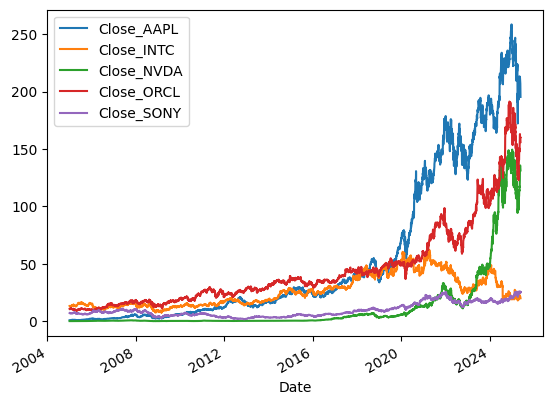

In [46]:
data_close.plot()

<Axes: xlabel='Date'>

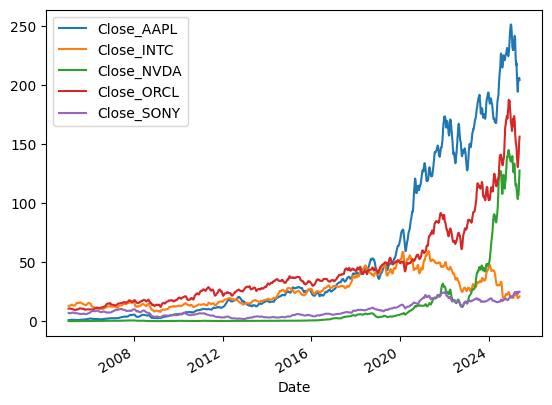

In [47]:
df_SMA.plot()

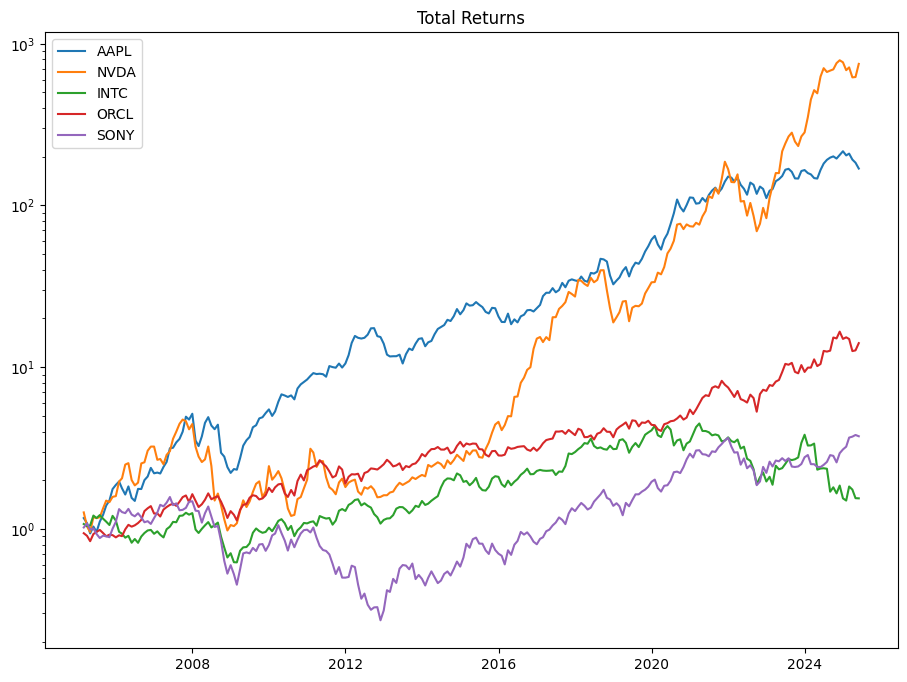

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])
for ticker in ticker_list:
    plt.plot(data_monthly_mom[ticker].cumprod(), label = ticker)
    
plt.yscale('log')
plt.title('Total Returns')
plt.legend()
plt.show()

### Çıktı Yorumu:

+ Bu grafik, her hisse senedine 1 dolar yatırılmış olsaydı zamanla **ne kadar getiri sağlayacağını** gösterir.
+ Zaman ekseninde **kimin daha volatil**, **kimin daha istikrarlı**, **kimin uzun vadede öne geçtiği** net şekilde gözlemleme yapılır.
+ Log skala sayesinde % değişimlerin kıyaslanması kolaylaşırtırı .

----------------------------------------------------------------------------------

### Output Interpretation:

+ This chart shows how much return each stock would have generated over time if $1 had been invested in each of them.
+ It allows clear observation of which stock is more volatile, which is more stable, and which has outperformed in the long term.
+ The log scale makes it easier to compare percentage changes.
